<a href="https://colab.research.google.com/github/tjdmstj/Chapter4/blob/main/chapter04_getting_started_with_neural_networks_i%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [1]:
imdb.load_data?

Object `imdb.load_data` not found.


In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [4]:
len(train_data[0])

218

In [5]:
train_labels[0]

1

In [6]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [9]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [10]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [12]:
"-".join(["a","B","c"])

'a-B-c'

In [7]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


In [13]:
train_data[0][:5]

[1, 14, 22, 16, 43]

In [16]:
reverse_word_index.get(1-3,"?")

'?'

In [17]:
reverse_word_index.get(14-3,"?")

'this'

In [18]:
reverse_word_index.get(22-3,"?")

'film'

In [19]:
reverse_word_index.get(16-3,"?")

'was'

In [20]:
reverse_word_index.get(43-3,"?")

'just'

In [8]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [24]:
len(train_data[0])

218

In [25]:
len(train_data[1])

189

In [26]:
train_data[0:6]

[1, 14, 22, 16, 43, 530]

In [27]:
train_data[0][2]

22

In [21]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [22]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [23]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [28]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [29]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [30]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [31]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 62ms/step - loss: 0.5127 - accuracy: 0.7973 - val_loss: 0.3965 - val_accuracy: 0.8648
Epoch 2/20
30/30 [==============================] - 1s 43ms/step - loss: 0.3063 - accuracy: 0.9073 - val_loss: 0.3134 - val_accuracy: 0.8814
Epoch 3/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2237 - accuracy: 0.9279 - val_loss: 0.2774 - val_accuracy: 0.8923
Epoch 4/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1754 - accuracy: 0.9443 - val_loss: 0.2764 - val_accuracy: 0.8897
Epoch 5/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1427 - accuracy: 0.9541 - val_loss: 0.2799 - val_accuracy: 0.8881
Epoch 6/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1189 - accuracy: 0.9626 - val_loss: 0.2924 - val_accuracy: 0.8850
Epoch 7/20
30/30 [==============================] - 1s 43ms/step - loss: 0.0999 - accuracy: 0.9707 - val_loss: 0.3117 - val_accuracy: 0.8828
Epoch 8/20
30

In [32]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [33]:
history_dict['loss']

[0.5127456188201904,
 0.30626606941223145,
 0.22367721796035767,
 0.17542974650859833,
 0.142740398645401,
 0.11890629678964615,
 0.09989496320486069,
 0.07952029258012772,
 0.06912402808666229,
 0.054697778075933456,
 0.04762173816561699,
 0.036645613610744476,
 0.029625771567225456,
 0.02168126031756401,
 0.019154870882630348,
 0.015934593975543976,
 0.009193341247737408,
 0.010449034161865711,
 0.008576855063438416,
 0.004013264551758766]

**Plotting the training and validation loss**

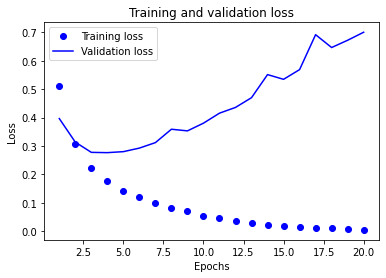

In [34]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

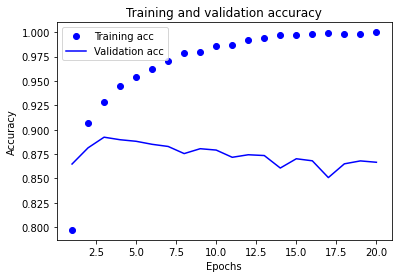

In [35]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [37]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 34ms/step - loss: 0.4571 - accuracy: 0.8165
Epoch 2/4
49/49 [==============================] - 2s 33ms/step - loss: 0.2626 - accuracy: 0.9093
Epoch 3/4
49/49 [==============================] - 2s 33ms/step - loss: 0.2021 - accuracy: 0.9294
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2899 - accuracy: 0.8850


In [38]:
results

[0.2899436950683594, 0.8849599957466125]

### Using a trained model to generate predictions on new data

In [39]:
model.predict(x_test)

array([[0.19731277],
       [0.9986837 ],
       [0.8840292 ],
       ...,
       [0.11203918],
       [0.05363962],
       [0.6639667 ]], dtype=float32)

### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [40]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [41]:
len(train_data)

8982

In [42]:
len(test_data)

2246

In [43]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [44]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [45]:
train_labels[10]

3

In [46]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

### Preparing the data

**Encoding the input data**

In [47]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [48]:
x_train.shape

(8982, 10000)

**Encoding the labels**

In [49]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [53]:
y_train[2]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [54]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [55]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [56]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [57]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [58]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 76ms/step - loss: 2.7040 - accuracy: 0.5346 - val_loss: 1.7581 - val_accuracy: 0.6420
Epoch 2/20
16/16 [==============================] - 1s 59ms/step - loss: 1.4569 - accuracy: 0.7016 - val_loss: 1.3227 - val_accuracy: 0.7140
Epoch 3/20
16/16 [==============================] - 1s 57ms/step - loss: 1.0775 - accuracy: 0.7740 - val_loss: 1.1543 - val_accuracy: 0.7410
Epoch 4/20
16/16 [==============================] - 1s 58ms/step - loss: 0.8441 - accuracy: 0.8224 - val_loss: 1.0338 - val_accuracy: 0.7820
Epoch 5/20
16/16 [==============================] - 1s 58ms/step - loss: 0.6741 - accuracy: 0.8584 - val_loss: 0.9664 - val_accuracy: 0.8040
Epoch 6/20
16/16 [==============================] - 1s 58ms/step - loss: 0.5385 - accuracy: 0.8865 - val_loss: 0.9501 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 1s 58ms/step - loss: 0.4353 - accuracy: 0.9094 - val_loss: 0.9120 - val_accuracy: 0.8150
Epoch 8/20
16

**Plotting the training and validation loss**

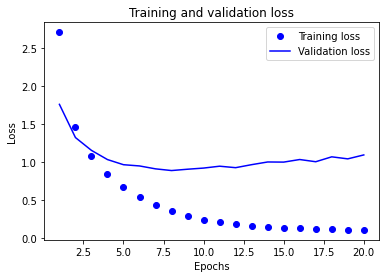

In [59]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

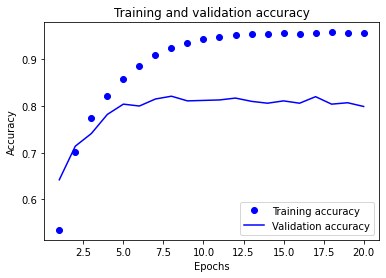

In [60]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [61]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 2s 54ms/step - loss: 2.5615 - accuracy: 0.5348
Epoch 2/9
18/18 [==============================] - 1s 55ms/step - loss: 1.3582 - accuracy: 0.7120
Epoch 3/9
18/18 [==============================] - 1s 52ms/step - loss: 1.0033 - accuracy: 0.7864
Epoch 4/9
18/18 [==============================] - 1s 53ms/step - loss: 0.7854 - accuracy: 0.8346
Epoch 5/9
18/18 [==============================] - 1s 53ms/step - loss: 0.6200 - accuracy: 0.8711
Epoch 6/9
18/18 [==============================] - 1s 53ms/step - loss: 0.4939 - accuracy: 0.8948
Epoch 7/9
18/18 [==============================] - 1s 53ms/step - loss: 0.3969 - accuracy: 0.9156
Epoch 8/9
18/18 [==============================] - 1s 54ms/step - loss: 0.3254 - accuracy: 0.9292
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9344 - accuracy: 0.7934


In [62]:
results

[0.9343747496604919, 0.7934104800224304]

In [63]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.182546749777382

### Generating predictions on new data

In [64]:
predictions = model.predict(x_test)

In [65]:
predictions[0].shape

(46,)

In [66]:
np.sum(predictions[0])

1.0

In [67]:
np.argmax(predictions[0])

3

### A different way to handle the labels and the loss

In [68]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [69]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25])

In [70]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [73]:
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128) 
#          validation_data=(x_val, y_val)

Epoch 1/20
63/63 [==============================] - 1s 20ms/step - loss: 0.4685 - accuracy: 0.8658
Epoch 2/20
63/63 [==============================] - 1s 20ms/step - loss: 0.4495 - accuracy: 0.8735
Epoch 3/20
63/63 [==============================] - 1s 21ms/step - loss: 0.4321 - accuracy: 0.8792
Epoch 4/20
63/63 [==============================] - 1s 20ms/step - loss: 0.4161 - accuracy: 0.8837
Epoch 5/20
63/63 [==============================] - 1s 20ms/step - loss: 0.4020 - accuracy: 0.8891
Epoch 6/20
63/63 [==============================] - 1s 21ms/step - loss: 0.3908 - accuracy: 0.8923
Epoch 7/20
63/63 [==============================] - 1s 21ms/step - loss: 0.3766 - accuracy: 0.8960
Epoch 8/20
63/63 [==============================] - 1s 21ms/step - loss: 0.3638 - accuracy: 0.8970
Epoch 9/20
63/63 [==============================] - 1s 21ms/step - loss: 0.3512 - accuracy: 0.9010
Epoch 10/20
63/63 [==============================] - 1s 22ms/step - loss: 0.3439 - accuracy: 0.9028
Epoch 11/

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [74]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 25ms/step - loss: 2.7175 - accuracy: 0.4407 - val_loss: 1.9241 - val_accuracy: 0.5720
Epoch 2/20
63/63 [==============================] - 1s 22ms/step - loss: 1.5866 - accuracy: 0.5950 - val_loss: 1.5487 - val_accuracy: 0.6070
Epoch 3/20
63/63 [==============================] - 1s 22ms/step - loss: 1.2926 - accuracy: 0.6591 - val_loss: 1.4201 - val_accuracy: 0.6630
Epoch 4/20
63/63 [==============================] - 2s 25ms/step - loss: 1.1223 - accuracy: 0.7164 - val_loss: 1.3703 - val_accuracy: 0.6820
Epoch 5/20
63/63 [==============================] - 1s 23ms/step - loss: 1.0017 - accuracy: 0.7383 - val_loss: 1.3220 - val_accuracy: 0.6950
Epoch 6/20
63/63 [==============================] - 2s 26ms/step - loss: 0.9065 - accuracy: 0.7613 - val_loss: 1.3190 - val_accuracy: 0.6980
Epoch 7/20
63/63 [==============================] - 2s 25ms/step - loss: 0.8289 - accuracy: 0.7803 - val_loss: 1.3260 - val_accuracy: 0.7030
Epoch 8/20
63

### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [75]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [76]:
train_data.shape

(404, 13)

In [77]:
test_data.shape

(102, 13)

In [79]:
train_targets[0]

15.2

### Preparing the data

**Normalizing the data**
정규화

In [80]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [81]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [82]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [83]:
all_scores

[2.1060092449188232, 2.543553113937378, 2.432856559753418, 2.455538749694824]

In [84]:
np.mean(all_scores)

2.384489417076111

**Saving the validation logs at each fold**

In [85]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [86]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

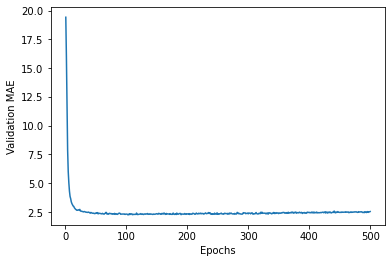

In [87]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

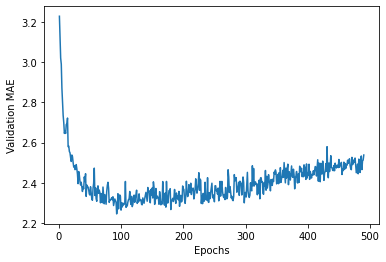

In [88]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [89]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 18.2426 - mae: 2.7220


In [90]:
test_mae_score

2.7220284938812256

### Generating predictions on new data

In [91]:
predictions = model.predict(test_data)
predictions[0]

array([9.870081], dtype=float32)

### Wrapping up

## Summary